In [1]:
# Esse arquivo aplica o filtro notch nos dados

import matplotlib
import mne

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [11., 8.]

e = '1'
trial = 3

In [2]:
# Carrega o epoch sem filtros
epochs = mne.read_epochs('files/unfiltered_epo.fif')

Reading files/unfiltered_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    4816.00 ms
        0 CTF compensation matrices available
125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows


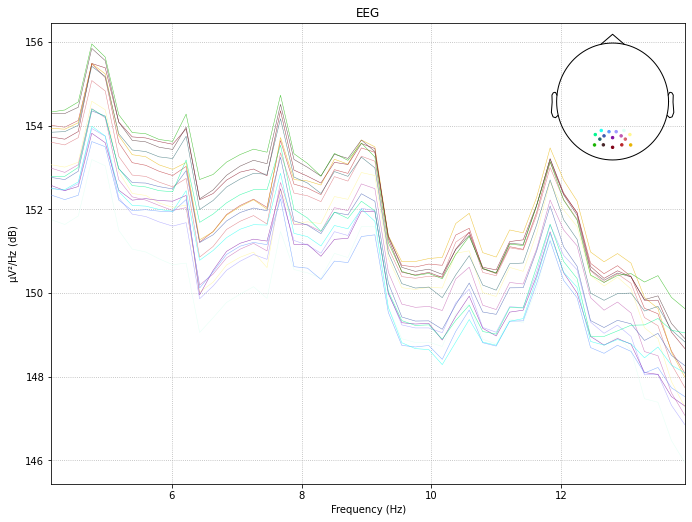

In [3]:
# Sem filtro
epochs[e][trial].plot_psd(fmin=4.0, fmax=14.0)
print('')

In [19]:
data = epochs.get_data()
print(data.shape)
data = data.transpose(1, 0, 2)
print(data.shape)
data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
print(data.shape)

raw = mne.io.RawArray(data, epochs.info)
raw.notch_filter(12)

#Eu não faço a minima ideia de como modificar o array para retornar ao shape original para poder mandar ele para o EpochsArray

#mne.EpochsArray(data, epochs.info)

(125, 16, 1205)
(16, 125, 1205)
(16, 150625)
Creating RawArray with float64 data, n_channels=16, n_times=150625
    Range : 0 ... 150624 =      0.000 ...   602.496 secs
Ready.
Setting up band-stop filter from 11 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 11.47
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 11.22 Hz)
- Upper passband edge: 12.53 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 12.78 Hz)
- Filter length: 1651 samples (6.604 sec)

